In [4]:
import geopandas as gpd
from shapely.wkb import dumps, loads
from shapely.wkt import loads as wkt_loads
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [5]:
%load_ext dotenv
%dotenv ../.env

In [6]:
cnx = create_engine(os.getenv('EDMDB'))

In [7]:
df = pd.read_csv("../data/numfloors.csv")

In [8]:
df.head()

,Borough,BBL,NumFloors
0,BK,3044520229,0.1
1,BK,3044520231,0.1
2,BK,3044520230,0.1
3,BK,3044520228,0.1
4,BK,3044520232,0.1


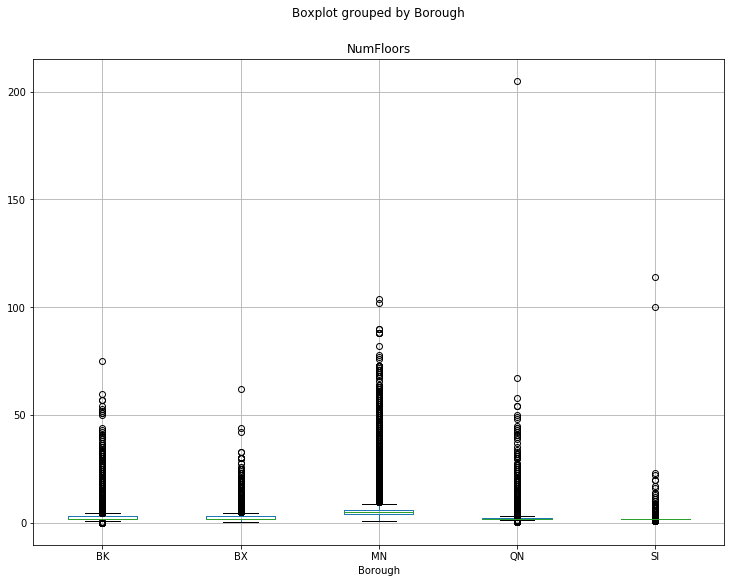

In [9]:
df.boxplot(by="Borough", column=['NumFloors'], figsize=(12, 9))

In [12]:
df.groupby("Borough")[['NumFloors']].median()

,NumFloors
Borough,
BK,2.0
BX,2.0
MN,5.0
QN,2.0
SI,2.0


In [13]:
df.groupby("Borough")[['NumFloors']].mean()

,NumFloors
Borough,
BK,2.429858
BX,2.469044
MN,6.365913
QN,2.139712
SI,1.995840


In [14]:
mn_numfloors = df.loc[df['Borough'] == 'MN']['NumFloors']
bk_numfloors = df.loc[df['Borough'] == 'BK']['NumFloors']
bx_numfloors = df.loc[df['Borough'] == 'BX']['NumFloors']
qn_numfloors = df.loc[df['Borough'] == 'QN']['NumFloors']
si_numfloors = df.loc[df['Borough'] == 'SI']['NumFloors']

In [15]:
iqr = []
iqr.append(["Manhattan",
np.percentile(mn_numfloors, 25, interpolation = 'midpoint'),
np.percentile(mn_numfloors, 75, interpolation = 'midpoint'),
np.percentile(mn_numfloors, 75, interpolation = 'midpoint') - np.percentile(mn_numfloors, 25, interpolation = 'midpoint')])
iqr.append(["Brooklyn",
np.percentile(bk_numfloors, 25, interpolation = 'midpoint'),
np.percentile(bk_numfloors, 75, interpolation = 'midpoint'),
np.percentile(bk_numfloors, 75, interpolation = 'midpoint') - np.percentile(bk_numfloors, 25, interpolation = 'midpoint')])
df = pd.DataFrame(iqr, columns = ['Borough', 'Q1', 'Q3', 'IQR'])
iqr.append(["Bronx",
np.percentile(bx_numfloors, 25, interpolation = 'midpoint'),
np.percentile(bx_numfloors, 75, interpolation = 'midpoint'),
np.percentile(bx_numfloors, 75, interpolation = 'midpoint') - np.percentile(bx_numfloors, 25, interpolation = 'midpoint')])
df = pd.DataFrame(iqr, columns = ['Borough', 'Q1', 'Q3', 'IQR'])
iqr.append(["Queens",
np.percentile(qn_numfloors, 25, interpolation = 'midpoint'),
np.percentile(qn_numfloors, 75, interpolation = 'midpoint'),
np.percentile(qn_numfloors, 75, interpolation = 'midpoint') - np.percentile(qn_numfloors, 25, interpolation = 'midpoint')])
df = pd.DataFrame(iqr, columns = ['Borough', 'Q1', 'Q3', 'IQR'])
iqr.append(["Staten Island",
np.percentile(si_numfloors, 25, interpolation = 'midpoint'),
np.percentile(si_numfloors, 75, interpolation = 'midpoint'),
np.percentile(si_numfloors, 75, interpolation = 'midpoint') - np.percentile(si_numfloors, 25, interpolation = 'midpoint')])
df = pd.DataFrame(iqr, columns = ['Borough', 'Q1', 'Q3', 'IQR'])
df

,Borough,Q1,Q3,IQR
0,Manhattan,4.0,6.0,2.0
1,Brooklyn,2.0,3.0,1.0
2,Bronx,2.0,3.0,1.0
3,Queens,2.0,2.5,0.5
4,Staten Island,2.0,2.0,0.0


In [16]:
mn_numfloors.head()

347764    1.0
347765    1.0
347766    1.0
347767    1.0
347768    1.0
Name: NumFloors, dtype: float64

In [17]:
df = pd.read_csv("../data/numfloors.csv")
bkdf = df[(df['Borough'] == 'BK')]
bkdf[bkdf['NumFloors'] > bkdf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False)

,Borough,BBL,NumFloors
264842,BK,3067760018,75.00
264841,BK,3074357501,60.00
264840,BK,3001450022,57.00
264839,BK,3001490001,57.00
264838,BK,3001670013,54.00
...,...,...,...
241682,BK,3012050055,3.25
241683,BK,3054650070,3.25
241684,BK,3065567502,3.25
241685,BK,3065350037,3.25


In [18]:
mndf = df[(df['Borough'] == 'MN')]
mndf[mndf['NumFloors'] > mndf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False)

,Borough,BBL,NumFloors
387838,MN,1000580001,104.0
387837,MN,1008350041,102.0
387836,MN,1012927502,90.0
387835,MN,1001797507,90.0
387834,MN,1010290019,88.0
...,...,...,...
380505,MN,1003847502,6.5
380504,MN,1012160003,6.5
380503,MN,1015940012,6.5
380502,MN,1004890020,6.5


In [19]:
bxdf = df[(df['Borough'] == 'BX')]
bxdf[bxdf['NumFloors'] > bxdf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False)

,Borough,BBL,NumFloors
347763,BX,2042500041,62.0
347762,BX,2028820229,44.0
347761,BX,2032510490,42.0
347760,BX,2051410120,33.0
347759,BX,2051350051,33.0
...,...,...,...
339647,BX,2028770353,3.5
339646,BX,2032500156,3.5
339645,BX,2043690045,3.5
339644,BX,2032630221,3.5


In [20]:
qndf = df[(df['Borough'] == 'QN')]
qndf[qndf['NumFloors'] > qndf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False)

,Borough,BBL,NumFloors
699465,QN,4097740166,205.00
699464,QN,4004370005,67.00
699463,QN,4004220007,58.00
699462,QN,4002660003,54.00
699461,QN,4002640017,54.00
...,...,...,...
657909,QN,4040700039,2.67
657790,QN,4015410027,2.67
657789,QN,4129300080,2.66
657788,QN,4094540016,2.60


In [21]:
sidf = df[(df['Borough'] == 'SI')]
sidf[sidf['NumFloors'] > sidf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False)

,Borough,BBL,NumFloors
814014,SI,5036860056,114.00
814013,SI,5012900096,100.00
814012,SI,5037550011,23.00
814011,SI,5029770021,22.00
814010,SI,5063160068,20.00
...,...,...,...
789894,SI,5001490266,2.25
789895,SI,5040760013,2.25
789896,SI,5005250147,2.25
789897,SI,5040790063,2.25


In [22]:
mndf_small = mndf[mndf['NumFloors'] > mndf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False).head()
bxdf_small = bxdf[bxdf['NumFloors'] > bxdf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False).head()
bkdf_small = bkdf[bkdf['NumFloors'] > bkdf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False).head()
qndf_small = qndf[qndf['NumFloors'] > qndf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False).head()
sidf_small = sidf[sidf['NumFloors'] > sidf['NumFloors'].quantile(.75)].sort_values(by='NumFloors', ascending=False).head()
small_df = mndf_small.append(bxdf_small).append(bkdf_small).append(qndf_small).append(sidf_small)
bbls = small_df.iloc[:,1]
bbl_list = '(' + str(bbls.iloc[0])
for i in range(1, bbls.shape[0]):
    bbl_list+=","+str(bbls.iloc[i])
bbl_list+=')'

In [23]:
query = '''SELECT "BBL", "Address", "NumFloors", ST_Transform(geom, 4326) AS geom FROM dcp.pluto192
WHERE "BBL" IN ''' + bbl_list
query

'SELECT "BBL", "Address", "NumFloors", ST_Transform(geom, 4326) AS geom FROM dcp.pluto192\nWHERE "BBL" IN (1000580001,1008350041,1012927502,1001797507,1010290019,2042500041,2028820229,2032510490,2051410120,2051350051,3067760018,3074357501,3001450022,3001490001,3001670013,4097740166,4004370005,4004220007,4002660003,4002640017,5036860056,5012900096,5037550011,5029770021,5063160068)'

In [24]:
bbls = gpd.GeoDataFrame.from_postgis(sql=query, con=cnx)
bbls

,BBL,Address,NumFloors,geom
0,3.074358e+09,2573 EAST 14 STREET,60.0,"MULTIPOLYGON (((-73.95498 40.58814, -73.95521 ..."
1,4.004370e+09,23-15 44 DRIVE,67.0,"MULTIPOLYGON (((-73.94402 40.74817, -73.94411 ..."
2,4.002660e+09,43-22 QUEENS STREET,54.0,"MULTIPOLYGON (((-73.93907 40.74675, -73.93935 ..."
3,2.051410e+09,2049 BARTOW AVENUE,33.0,"MULTIPOLYGON (((-73.83322 40.87179, -73.83243 ..."
4,1.008350e+09,338 5 AVENUE,102.0,"MULTIPOLYGON (((-73.98673 40.74857, -73.98655 ..."
5,2.028820e+09,16 RICHMAN PLAZA,44.0,"MULTIPOLYGON (((-73.92153 40.85248, -73.92284 ..."
6,1.000580e+09,185 GREENWICH STREET,104.0,"MULTIPOLYGON (((-74.01267 40.71300, -74.01246 ..."
7,1.001798e+09,15 LEONARD STREET,90.0,"MULTIPOLYGON (((-74.00779 40.71892, -74.00793 ..."
8,4.002640e+09,28-30 JACKSON AVENUE,54.0,"MULTIPOLYGON (((-73.93733 40.74798, -73.93819 ..."
9,3.001490e+09,138 WILLOUGHBY STREET,57.0,"MULTIPOLYGON (((-73.98259 40.69163, -73.98287 ..."


In [25]:
from ipyleaflet import Map, basemaps, GeoData, basemap_to_tiles, LayersControl, FullScreenControl, Popup, Marker
from ipywidgets import HTML

m = Map(center=(40.730610, -73.935242), zoom=11)

dark_matter_layer = basemap_to_tiles(basemaps.CartoDB.DarkMatter, close_popup_on_click=True)
m.add_layer(dark_matter_layer)

In [26]:
bbls_layer = GeoData(geo_dataframe = bbls, 
              style={'color': 'green', 'opacity':10, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.3},
              name = 'new')

In [27]:
m.add_layer(bbls_layer)
m.add_control(LayersControl())
m.add_control(FullScreenControl())

In [28]:
for i in range(bbls.shape[0]):
    center = (bbls.loc[i, 'geom'].centroid.y,
              bbls.loc[i, 'geom'].centroid.x)
    bbl = str(list(bbls['BBL'])[i])
    marker = Marker(location=center)
    numfloors = bbls['NumFloors'][i]
    address = bbls['Address'][i]
    m.add_layer(marker)
    marker.popup = HTML(value=f'''<a href=https://zola.planning.nyc.gov/bbl/{bbl}> {bbl} </a>
                                  <div> Address: {address} </div>
                                  <div> NumFloors: {numfloors} </div>''')

In [29]:
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …